In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d

In [27]:
import os
os.getcwd()

'c:\\Users\\sunba\\dsi_assignments\\LCR\\01_materials'

In [28]:
#load in our data
cancer=pd.read_csv('notebooks/dataset/wdbc.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [30]:
cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [31]:
cancer['diagnosis']=cancer['diagnosis'].replace({
    'M': 'Malignment',
    'B': 'Benign'
})

In [32]:
cancer['diagnosis'].value_counts(normalize=True)

diagnosis
Benign        0.627417
Malignment    0.372583
Name: proportion, dtype: float64

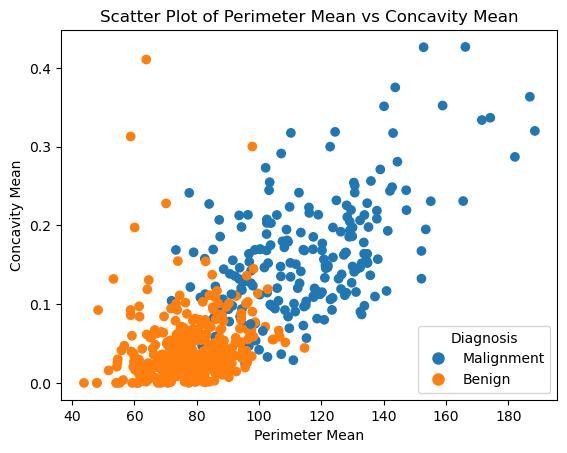

In [33]:
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Plot
plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'], 
            color=cancer["diagnosis"].map(color_map))

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add labels and legend
plt.xlabel('Perimeter Mean')
plt.ylabel('Concavity Mean')
plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')
plt.legend(handles=handles, title='Diagnosis')
plt.show()


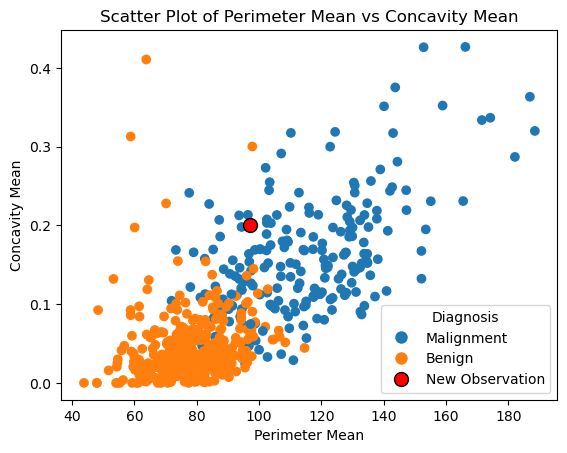

In [34]:
# Plot existing data
plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'], 
            color=cancer["diagnosis"].map(color_map))

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add new observation
new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20}
plt.scatter(new_observation['perimeter_mean'], new_observation['concavity_mean'],
            color='red', edgecolor='black', s=100, label='New Observation')

# Add labels and legend
plt.xlabel('Perimeter Mean')
plt.ylabel('Concavity Mean')
plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')
plt.legend(handles=handles + [plt.Line2D([0], [0], marker='o', color='w', 
                                          markerfacecolor='red', markeredgecolor='black', 
                                          markersize=10, label='New Observation')], 
           title='Diagnosis')
plt.show()

In [35]:
# new observation
#perimeter meam =97
# concavity mean=0.2
new_obs_Perimeter=97
new_obs_Concavity=0.2


In [38]:
cancer['dist_from_new'] =((cancer['perimeter_mean']-new_obs_Perimeter)**2+
(cancer['concavity_mean']-new_obs_Concavity)**2)**(1/2)

In [39]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,dist_from_new
0,842302,Malignment,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,25.800194
1,842517,Malignment,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,35.900178
2,84300903,Malignment,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,33.000000
3,84348301,Malignment,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,19.420044
4,84358402,Malignment,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,38.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignment,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,45.000021
565,926682,Malignment,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,34.200046
566,926954,Malignment,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,11.300511
567,927241,Malignment,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,43.100266


In [40]:
nearest_5=cancer.nsmallest(5,'dist_from_new')[[
    'perimeter_mean',
    'concavity_mean',
    'diagnosis',
    'dist_from_new'
]]

In [41]:
nearest_5

,perimeter_mean,concavity_mean,diagnosis,dist_from_new
291,97.03,0.05940,Benign,0.143765
138,96.85,0.15390,Malignment,0.156924
15,96.73,0.16390,Malignment,0.272403
514,97.26,0.07486,Malignment,0.288548
54,97.26,0.05253,Malignment,0.298910


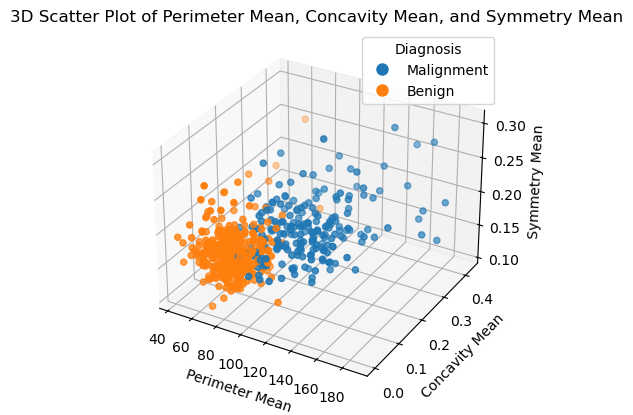

In [42]:
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Create a 3D plot
ax = plt.axes(projection="3d")

# Plot data points with color corresponding to diagnosis
sc = ax.scatter3D(cancer['perimeter_mean'], cancer['concavity_mean'], cancer['symmetry_mean'], 
                  c=cancer['diagnosis'].map(color_map), marker='o')

# Add axis labels
ax.set_xlabel('Perimeter Mean')
ax.set_ylabel('Concavity Mean')
ax.set_zlabel('Symmetry Mean')
ax.set_title('3D Scatter Plot of Perimeter Mean, Concavity Mean, and Symmetry Mean')

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add legend
plt.legend(handles=handles, title='Diagnosis')

# Show plot
plt.show()

In [44]:
new_obs_Perimeter=97
new_obs_Concavity=0.2
new_obs_Symmetry=0.22



In [46]:
cancer['dist_from_new']=((cancer['perimeter_mean']-new_obs_Perimeter)**2 +
(cancer['concavity_mean']-new_obs_Concavity**2 )+
 (cancer['symmetry_mean']-new_obs_Symmetry)**2)**(1/2)

In [49]:
#take the closest 5 neighbours
nearest_5= cancer.nsmallest(5,'dist_from_new')[[
    'perimeter_mean',
    'concavity_mean',
    'symmetry_mean',
    'diagnosis',
    'dist_from_new'

]]

In [50]:
nearest_5

,perimeter_mean,concavity_mean,symmetry_mean,diagnosis,dist_from_new
291,97.03,0.05940,0.1879,Benign,0.146049
54,97.26,0.05253,0.1616,Malignment,0.289034
414,96.71,0.04686,0.1852,Malignment,0.303597
514,97.26,0.07486,0.1561,Malignment,0.326410
138,96.85,0.15390,0.1957,Malignment,0.370122


In [51]:
from sklearn import set_config
#output dataframes
set_config(transform_output='pandas')

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
cancer_train = cancer[['diagnosis',
                       'perimeter_mean',
                       'concavity_mean',
                       ]]
cancer_train

,diagnosis,perimeter_mean,concavity_mean
0,Malignment,122.80,0.30010
1,Malignment,132.90,0.08690
2,Malignment,130.00,0.19740
3,Malignment,77.58,0.24140
4,Malignment,135.10,0.19800
...,...,...,...
564,Malignment,142.00,0.24390
565,Malignment,131.20,0.14400
566,Malignment,108.30,0.09251
567,Malignment,140.10,0.35140


In [56]:
knn =KNeighborsClassifier (n_neighbors=5)
knn

KNeighborsClassifier()

In [59]:
#define our predictor response variable
X= cancer_train[['perimeter_mean','concavity_mean']]
Y= cancer_train['diagnosis']

In [60]:
knn.fit(X,Y)


KNeighborsClassifier()

In [62]:
new_obs= pd.DataFrame({'perimeter_mean':[97], 'concavity_mean':[0.2]})
new_obs

,perimeter_mean,concavity_mean
0,97,0.2


In [63]:
knn.predict(new_obs)

array(['Malignment'], dtype=object)